# Gauss Elimination
## Uncovering the solution of linear algebra equations

In the previous notebook, [01_Linear-Algebra](./01_Linear-Algebra.ipynb), you turned sets of equations into linear algebra problems in the form

$\mathbf{Ax} = \mathbf{b}$

Our equations youre composed of three groups of variables and the dimensions of unknown vector = degrees of freedom of the system. 

- Given set of known outputs, $b_{1},~b_{2},~...b_{N}$ 
- set of equations with constants, $A_{11},~A_{12},\dots,~A_{nn}$
- unknown inputs, $x_{1},~x_{2},~...x_{N}$, 

## Example 

Consider a problem with 2 DOF:

$x+3y=1$

$2x+y=1$

$\left[ \begin{array}{cc}
1 & 3 \\
2 & 1 \end{array} \right]
\left[\begin{array}{c} 
x \\ 
y \end{array}\right]=
\left[\begin{array}{c} 
1 \\
1\end{array}\right]$

The solution for $x_{1}$ and $x_{2}$ is the intersection of two lines:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

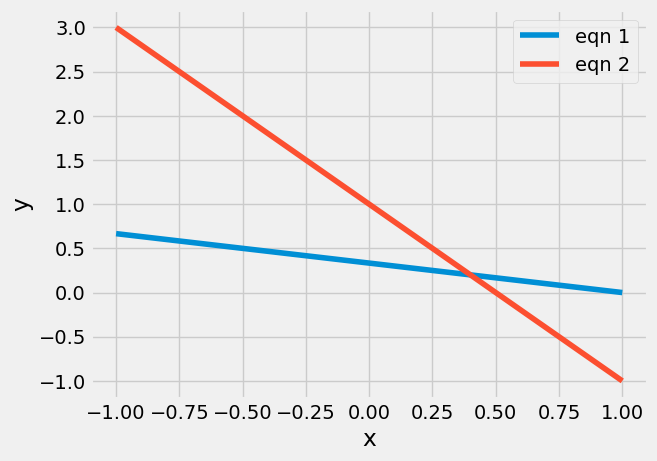

In [2]:
x = np.linspace(-1,1)
y1 = (1-x)/3
y2 = (1-2*x)

plt.plot(x,y1, label='eqn 1')
plt.plot(x,y2, label='eqn 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

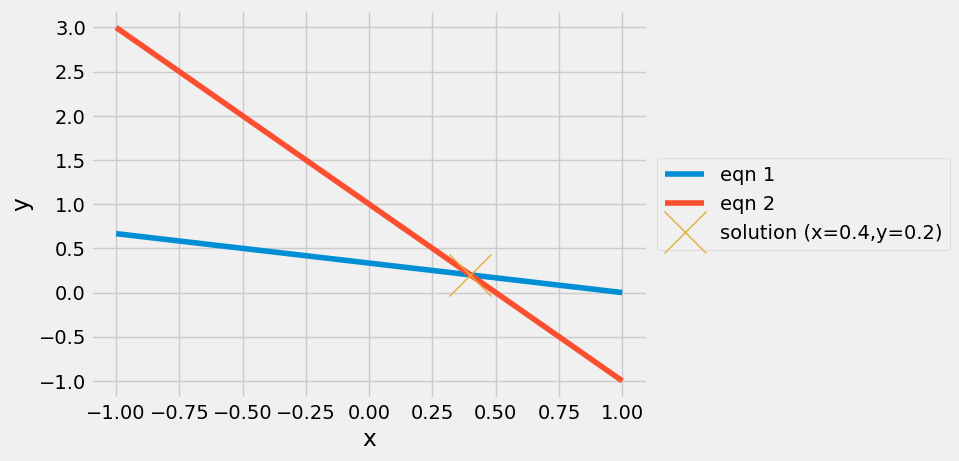

In [3]:
A=np.array([[1,3],[2,1]])
b=np.array([1,1])
xsol = np.linalg.solve(A,b)


plt.plot(x,y1, label='eqn 1')
plt.plot(x,y2, label='eqn 2')
plt.plot(xsol[0],xsol[1],'x',markersize=30,label='solution (x={},y={})'.format(*xsol))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

## Graphical interpretation of Ill-conditioned

In this form, you can see what ill-conditioning looks like in terms of intersecting lines

The specification of _independent equations_ is best illustrated using _dependent_ equations:

1. $(1+\delta)x+y = 3$

2. $2x+(2+\delta)y=6$

[0. 3.]


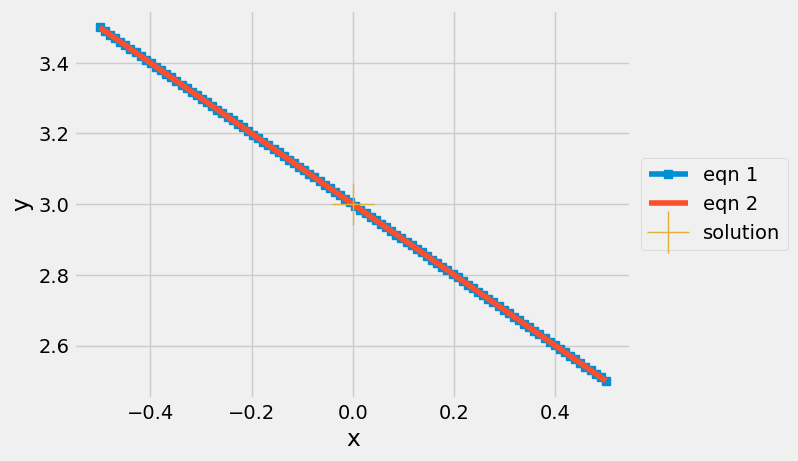

In [4]:
d=2e-16
A=np.array([[1+d,1],[2,2+d]])
b=np.array([3,6])
xsol = np.linalg.solve(A,b)
print(xsol)
x = np.linspace(xsol[0]-0.5,xsol[0]+0.5,100)
d=3e-16
y1 = (3-(1+d)*x)
y2 = (6-2*x)/2/(1+d)

plt.plot(x,y1,'s-', label='eqn 1')
plt.plot(x,y2, label='eqn 2')
plt.plot(xsol[0],xsol[1],'+',markersize=30,label='solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Discussion

The intersection between the equations lines 1 and 2 seems to occur everywhere. Why is there still a __single__ solution?

## 3 Degrees of Freedom

For a $3\times3$ matrix, the solution is the intersection of the 3 planes.

$10x+2y+z=1$

$2x+y+z=1$

$x+2y+10z=1$

$\left[ \begin{array}{cc}
10 & 2 & 1\\
2 & 1 & 1 \\
1 & 2 & 10\end{array} \right]
\left[\begin{array}{c} 
x \\ 
y \\
z \end{array}\right]=
\left[\begin{array}{c} 
1 \\
1 \\
1\end{array}\right]$

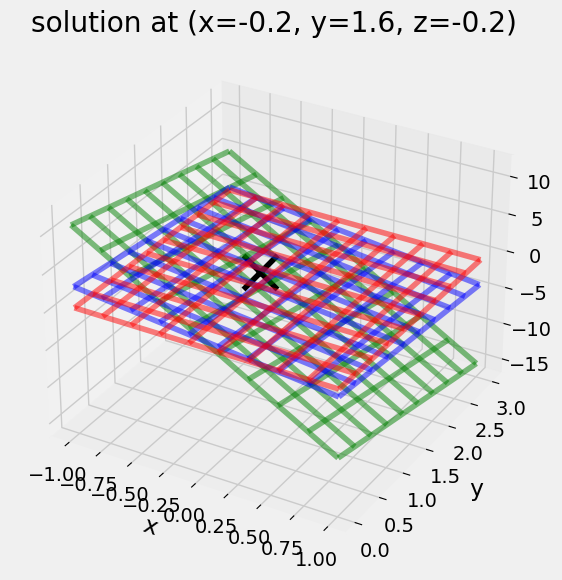

In [5]:
from mpl_toolkits.mplot3d import axes3d

X,Y = np.meshgrid(np.linspace(-1,1,10),np.linspace(0,3,10))
Z1 = 1-10*X-2*Y
Z2 = 1-2*X-Y
Z3 = (1-X-2*Y)/10
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X,Y,Z1,color='g',alpha=0.5)
ax.plot_wireframe(X,Y,Z2,color='b',alpha=0.5)
ax.plot_wireframe(X,Y,Z3,color='r',alpha=0.5)
x=np.linalg.solve(np.array([[10,2, 1],[2,1, 1],[ 1, 2, 10]]),np.array([1,1,1]));
ax.scatter(x[0],x[1],x[2],s=600,c='k',marker='x')
plt.title('solution at (x={}, y={}, z={})'.format(*x))
ax.set_xlabel('x      ')
ax.set_ylabel('   y')
ax.set_zlabel(' z');
plt.tight_layout()

## Exercise 

Create a set of 3 equations and 3 unknowns where two of the equations are multiples of each other _e.g. equation 2 = 2*(equation 1)._ Plot the resulting 3D planes using the same code you used above, _it is copied here:_

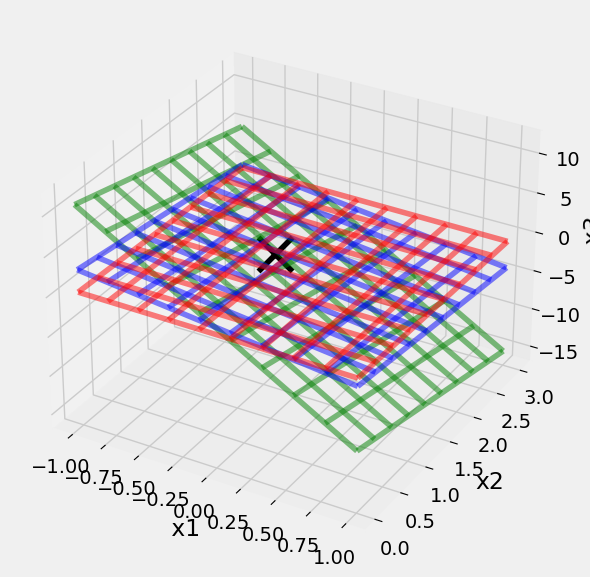

In [6]:
X,Y = np.meshgrid(np.linspace(-1,1,10),np.linspace(0,3,10))
# Define your Z1,Z2,Z3 based upon your chosen equations
# Z1
# Z2
# Z3
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X,Y,Z1,color='g',alpha=0.5)
ax.plot_wireframe(X,Y,Z2,color='b',alpha=0.5)
ax.plot_wireframe(X,Y,Z3,color='r',alpha=0.5)
x=np.linalg.solve(np.array([[10,2, 1],[2,1, 1],[ 1, 2, 10]]),np.array([1,1,1]));
ax.scatter(x[0],x[1],x[2],s=600,c='k',marker='x')
ax.set_xlabel(' x1')
ax.set_ylabel('x2')
ax.set_zlabel('   x3');
plt.tight_layout()

## N>3 Degrees of Freedoms

After 3 DOF problems, the solutions are described as *hyperplane* intersections. Which are even harder to visualize. It helps to develop rules for 2 DOF and 3 DOF problems that you can generalize into higher dimensions. Consider these two versions of a system of equations

__1:__

$10x_{1}+2x_{2}+x_{3}=1$

$2x_{1}+x_{2}+x_{3}=1$

$x_{1}+2x_{2}+10x_{3}=1$

__2:__

$10x_{1}+2x_{2}+x_{3}=1$

$\frac{3}{5}x_{2}+\frac{4}{5}x_{3}=\frac{4}{5}$

$7.5x_{3}=-\frac{3}{2}$

Version __2__ is much easier to solve than version __1__. The amazing thing is that version __2__ represents the __same equation set as version 1.__ How can this be possible? Well, lets take a look at a simpler, 2 DOF, example before you dive into 3, 4, and more independent equations and unknowns. 

Consider two masses connected by springs with forces applied. 

<img src="../images/spring_mass.png" style="height: 200px;"/> 

You want to find the position of each mass when the system is at rest so you have two equations and two unknowns

1. $-k_1 x_1 -k_2 x_1 + k_2 x_2 = F_1$

2. $k_2 x_1 -k_2 x_2 -k_3 x_2 = F_2$

Or, plugging in the given values $k_1=100~N/m,~k_2=300~N/m,~k_3=150~N/m,~F_1=10~N,~F_2=20~N$

1. $-400x_1+300x_2 = 10$

2. $300x_1-450x_2 = 20$

Now, I can multiply both sides of equation (1) by -300/400=-3/4

1. (a) $300x_1-225x_2 = -7.5$

2. $300x_1-450x_2 = 20$

Then, subtract equation (1(a)) from (2) and replace 1(a) with 1:

1. $-400x_1+300x_2 = 10$

2. _(2-1(a))_ $0x_1-225x_2 = 27.5$

## Solving equations (1) and (2a-1)

Now, I can solve the second equation

$x_2 = -0.122~m$

and substitute $x_2$ into equation (1)

$-400x_1 + 300(-0.122) =10$

$x_1 = -0.11665~m$

## Gauss elimination

The process you used for the previous spring-mass example, is called __Gauss elimination__. You combine the set of equations in a clever way such that the final equation has one variable, then you use a __backward-substitution__ method to solve for each of the unknown variables. Let's consider the 3D case next, 

### Solving sets of equations systematically

You take the $3\times3$ matrix and the length 3 vector and combine all of the known constants as such, 

$\left[ \begin{array}{ccc|c}
   & A & & y \\
10 & 2 & 1 & 1\\
2 & 1 & 1  & 1 \\
1 & 2 & 10 & 1\end{array} 
\right]. $

In [7]:
Ay= np.array([[10,2,1,1],[2,1,1,1],[1,2,10,1]],dtype=float)
print(Ay)

[[10.  2.  1.  1.]
 [ 2.  1.  1.  1.]
 [ 1.  2. 10.  1.]]


Now, subtract $1/5*A[0,:]$ from $A[1]$. 

$\left[ \begin{array}{ccc|c}
   & A & & y \\
10 & 2 & 1 & 1\\
0 & 3/5 & 4/5  & 4/5 \\
1 & 2 & 10 & 1\end{array} 
\right] $

In [8]:
Ay[1,:]= Ay[1,:]-0.2*Ay[0,:]
print(Ay)

[[10.   2.   1.   1. ]
 [ 0.   0.6  0.8  0.8]
 [ 1.   2.  10.   1. ]]


Now, subtract $1/10*A[0,:]$ from $A[2,:]$. 

$\left[ \begin{array}{ccc|c}
   & A & & y \\
10 & 2 & 1 & 1\\
0 & 3/5 & 4/5  & 4/5 \\
0 & 1.8 & 9.9 & 0.9\end{array} 
\right] $

In [9]:
Ay[2,:]= Ay[2,:]-0.1*Ay[0,:]
print(Ay)

[[10.   2.   1.   1. ]
 [ 0.   0.6  0.8  0.8]
 [ 0.   1.8  9.9  0.9]]


Finally, you can substract $1.8/0.6*A[1,:]$ from $A[2,:]

$\left[ \begin{array}{ccc|c}
   & A & & y \\
10 & 2 & 1 & 1\\
0 & 3/5 & 4/5  & 4/5 \\
0 & 0 & 7.5 & -1.5\end{array} 
\right] $

In [10]:
Ay[2,:]= Ay[2,:]-1.8/0.6*Ay[1,:]
print(Ay)

[[ 1.00000000e+01  2.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  6.00000000e-01  8.00000000e-01  8.00000000e-01]
 [ 0.00000000e+00  2.22044605e-16  7.50000000e+00 -1.50000000e+00]]


## Back substitution

You have three equations and three unknowns. You can solve for $x_3$ in equation (3) easily. Then, you can solve for $x_2$ in equation (2) using equation (3)'s solution for $x_3$. Finally, you can solve for $x_1$ using equation (1) and the solutions for $x_2$ and $x_3$. 

(3), $7.5x_{3}=-1.5$ 

* $x_{3}=-\frac{1}{5}$

(2), $3/5x_{2}+4/5(-1/5)=1$ 

* $x_{2}=\frac{8}{5}$

(1), $10x_{1}+2(8/5)+1(-\frac{1}{5})=1$

* $x_1 = -1/5$

## Automate Gauss Elimination

You can automate Gauss elimination with a function whose input is A and y:

`x=GaussNaive(A,y)`

In [11]:
def GaussNaive(A,y):
    '''GaussNaive: naive Gauss elimination
    x = GaussNaive(A,b): Gauss elimination without pivoting.
    solution method requires floating point numbers, 
    as such the dtype is changed to float
    
    Arguments:
    ----------
    A = coefficient matrix
    y = right hand side vector
    returns:
    ---------
    x = solution vector
    Aug = augmented matrix (used for back substitution)'''
    [m,n] = np.shape(A)
    Aug = np.block([A,y.reshape(n,1)])
    Aug = Aug.astype(float)
    if m!=n: error('Matrix A must be square')
    nb = n+1
    # Gauss Elimination 
    for k in range(0,n-1):
        for i in range(k+1,n):
            if Aug[i,k] != 0.0:
                factor = Aug[i,k]/Aug[k,k]
                Aug[i,:] = Aug[i,:] - factor*Aug[k,:]
    # Back substitution
    x=np.zeros(n)
    for k in range(n-1,-1,-1):
        x[k] = (Aug[k,-1] - Aug[k,k+1:n]@x[k+1:n])/Aug[k,k]
    return x,Aug

In [12]:
A=np.array([[10,2, 1],[2,1, 1],[ 1, 2, 10]])
y=np.array([1,1,1])

In [13]:
x, Aug = GaussNaive(A,y)

print('x=  \t\tAug=')
for i in range(len(x)):
    print('{:.2f}\t\t'.format(x[i]) , Ay[i])

x=  		Aug=
-0.20		 [10.  2.  1.  1.]
1.60		 [0.  0.6 0.8 0.8]
-0.20		 [ 0.00000000e+00  2.22044605e-16  7.50000000e+00 -1.50000000e+00]


## Revisit Example with Mixing Tanks

<img src="../images/mixing_tanks_var.png" style="height: 200px;"/> 

In the diagram above you have three tanks of water that are mixing two concentrations of salt water with $c_1~mg/m^3$ entering tank 1 and $c_2~mg/m^3$ entering tank three. The outlet is located on the middle tank 2, but the concentration is unknown. In [01_Linear-Algebra](./01_Linear-Algebra.ipynb), you used a fixed value for $x_1=5~mg/m^3$ and $x_2=1~mg/m^3$. Let's examine three cases for

1. $x_1=5~mg/m^3,~and~x_2=1~mg/m^3$

2. $x_1=50~mg/m^3,~and~x_2=10~mg/m^3$

3. $x_1=1~mg/m^3,~and~x_2=5~mg/m^3$

Following the same procedure as [01_Linear-Algebra](./01_Linear-Algebra.ipynb), you can create the system of equations in the following forms for (1-3):

1. $\left[ \begin{array}{ccc}
-7 & 3 & 0 \\
7 & -19 & 12 \\
0 & 4 & -12 \end{array} \right]
\left[\begin{array}{c} 
c_{1} \\ 
c_{2} \\
c_{3}\end{array}\right]=\left[\begin{array}{c} 
-20 \\
0 \\
-8\end{array}\right]$

2. $\left[ \begin{array}{ccc}
-7 & 3 & 0 \\
7 & -19 & 12 \\
0 & 4 & -12 \end{array} \right]
\left[\begin{array}{c} 
c_{1} \\ 
c_{2} \\
c_{3}\end{array}\right]=\left[\begin{array}{c} 
-200 \\
0 \\
-80\end{array}\right]$

3. $\left[ \begin{array}{ccc}
-7 & 3 & 0 \\
7 & -19 & 12 \\
0 & 4 & -12 \end{array} \right]
\left[\begin{array}{c} 
c_{1} \\ 
c_{2} \\
c_{3}\end{array}\right]=\left[\begin{array}{c} 
-4 \\
0 \\
-40\end{array}\right]$

Our main system of equations, $\mathbf{A}$, is unchanged. The right-hand-side, $\mathbf{b}$ changes for each new set of concentrations you specify. Let's see what the solutions and augmented matrices are based upon the `GaussNaive` function

In [14]:
A=np.array([[-7,3,0],[7,-19,12],[0,4,-12]])
b1=np.array([-20,0,-8])
b2=np.array([-200,0,-80])
b3=np.array([-4,0,-40])

x1,Aug1 = GaussNaive(A,b1)
x2,Aug2 = GaussNaive(A,b2)
x3,Aug3 = GaussNaive(A,b3)

In [15]:
print('example 1')
print('x=  \t\tAug=')
for i in range(len(x)):
    print('{:.2f}\t\t'.format(x[i]) , Ay[i])
print('\nexample 2')
print('x=  \t\tAug=')
for i in range(len(x)):
    print('{:.2f}\t\t'.format(x[i]) , Ay[i])
print('\nexample 3')
print('x=  \t\tAug=')
for i in range(len(x)):
    print('{:.2f}\t\t'.format(x[i]) , Ay[i])

example 1
x=  		Aug=
-0.20		 [10.  2.  1.  1.]
1.60		 [0.  0.6 0.8 0.8]
-0.20		 [ 0.00000000e+00  2.22044605e-16  7.50000000e+00 -1.50000000e+00]

example 2
x=  		Aug=
-0.20		 [10.  2.  1.  1.]
1.60		 [0.  0.6 0.8 0.8]
-0.20		 [ 0.00000000e+00  2.22044605e-16  7.50000000e+00 -1.50000000e+00]

example 3
x=  		Aug=
-0.20		 [10.  2.  1.  1.]
1.60		 [0.  0.6 0.8 0.8]
-0.20		 [ 0.00000000e+00  2.22044605e-16  7.50000000e+00 -1.50000000e+00]


## Solving the same problem with different inputs  
### LU decomposition

Look at the form of `Aug` in solutions 1-3. The only difference is in the last column, the $\mathbf{b}$. Is there a way that you can save our work from example 1 and apply it to examples 2-3? The trouble is that $\mathbf{b}$ goes through the same changes that our augmented form of $\mathbf{A}$ goes through so you need to keep track some how. 

This process is called __LU decomposition__, where the __L__ refers to __lower triangular matrix__ and the __U__ refers to __upper triangular matrix__. You frame the problem in this way

$\mathbf{A} = \mathbf{LU}$

where the diagonal elements of $\mathbf{L}$ are 1 and the elements of $\mathbf{U}$ are the left-hand side of the Gauss-elimination augmented matrix _(note: there is more than one method to determine LU matrices. This method is the [Doolittle Decomposition](https://en.wikipedia.org/wiki/LU_decomposition#Doolittle_algorithm))_. Therefore, in the case of this mixing tank example

$\mathbf{A} =
\left[ \begin{array}{ccc}
-7 & 3 & 0 \\
7 & -19 & 12 \\
0 & 4 & -12 \end{array} \right]=
\left[ \begin{array}{ccc}
1 & 0 & 0 \\
L_{21} & 1 & 0 \\
L_{31} & L_{32} & 1 \end{array} \right]
\left[ \begin{array}{ccc}
-7 & 3 & 0 \\
0 & -16 & 12 \\
0 & 0 & -9 \end{array} \right]$

This leaves three unknown values, $L_{21},~L_{31},~and~L_{32}$. In general, for $n$-equations, there are $n(n-1)/2$ unknowns. Before you develop a method to calculate $L_{21},~L_{31},~and~L_{32}$, let's observe what you can do with the results. In the case of the mixing tank problem the factorization is as such

$\mathbf{A} =
\left[ \begin{array}{ccc}
-7 & 3 & 0 \\
7 & -19 & 12 \\
0 & 4 & -12 \end{array} \right]=
\left[ \begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & -1/4 & 1 \end{array} \right]
\left[ \begin{array}{ccc}
-7 & 3 & 0 \\
0 & -16 & 12 \\
0 & 0 & -9 \end{array} \right]$

In [16]:
L=np.array([[1,0,0],[-1,1,0],[0,-1/4,1]])
U=np.array([[-7,3,0],[0,-16,12],[0,0,-9]])

### Exercise

Use the `@`-symbol to confirm LU = A. 

`L@U`

Now, you can rewrite our problem $\mathbf{Ax} = \mathbf{b}$ as $\mathbf{LUx} = \mathbf{b}$. This may not see helpful at first, but take a look at the new system of equations that you can solve

1. $\mathbf{Ly} = \mathbf{b}$

2. $\mathbf{Ux} = \mathbf{y}$

These equations work because our original problem was stated as

$\mathbf{LUx-b} = \mathbf{0}$

So, if you pull out $\mathbf{L}$, 

$\mathbf{L(Ux-y)}=\mathbf{0}$,

where $\mathbf{Ly}=\mathbf{b}$.

in the case of the mixing containers case 1: $(x_1 =5~mg/m^3,~x_2=1~mg/m^3)$ 

1. $\left[ \begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & -1/4 & 1 \end{array} \right]\left[\begin{array}{c} 
y_{1} \\ 
y_{2} \\
y_{3}\end{array}\right]=
\left[\begin{array}{c} 
-20 \\ 
0 \\
-8\end{array}\right]
$

2. $\left[ \begin{array}{ccc}
-7 & 3 & 0 \\
0 & -16 & 12 \\
0 & 0 & -9 \end{array} \right]
\left[\begin{array}{c} 
c_{1} \\ 
c_{2} \\
c_{3}\end{array}\right]=
\left[\begin{array}{c} 
y_{1} \\ 
y_{2} \\
y_{3}\end{array}\right]$

You can solve these equations without Gauss elimination. You just need to use a __forward substitution__ for $\mathbf{Ly}=\mathbf{b}$ and a __backward substitution__ for $\mathbf{Ux}=\mathbf{y}$.

In [17]:
def solveLU(L,U,b):
    '''solveLU: solve for x when LUx = b
    x = solveLU(L,U,b): solves for x given the lower and upper 
    triangular matrix storage
    uses forward substitution for 
    1. Ly = b
    then backward substitution for
    2. Ux = y
    
    Arguments:
    ----------
    L = Lower triangular matrix
    U = Upper triangular matrix
    b = output vector
    
    returns:
    ---------
    x = solution of LUx=b '''
    n=len(b)
    x=np.zeros(n)
    y=np.zeros(n)
        
    # forward substitution
    for k in range(0,n):
        y[k] = b[k] - L[k,0:k]@y[0:k]
    # backward substitution
    for k in range(n-1,-1,-1):
        x[k] = (y[k] - U[k,k+1:n]@x[k+1:n])/U[k,k]
    return x

In [18]:
%%time
b1=np.array([-20,0,-8])
b2=np.array([-200,0,-80])
b3=np.array([-4,0,-40])

c1 = solveLU(L,U,b1)
c2 = solveLU(L,U,b2)
c3 = solveLU(L,U,b3)

CPU times: user 708 µs, sys: 148 µs, total: 856 µs
Wall time: 1.63 ms


In [19]:
%%time
b1=np.array([-20,0,-8])
b2=np.array([-200,0,-80])
b3=np.array([-4,0,-40])

c1,aug = GaussNaive(A,b1)
c2,aug = GaussNaive(A,b2)
c3,aug = GaussNaive(A,b3)

CPU times: user 332 µs, sys: 0 ns, total: 332 µs
Wall time: 244 µs


### Comparing Gauss elimination to LU solution method

In the last two comparisons, it is not always immediately obvious that the LU-decomposition solution is faster. So, let's increase the odds. Let's create a surface plot of the mass flow of salt coming out of the mixing tanks $(c_2*12~m^3/s)$ as a function of concentrations flowing into tanks 1 and 3

* $\dot{m}_{out} = f(x_1,~x_2)$

* $x_1=[0...50]~mg/m^3$

* $x_2=[0...50]~mg/m^3$

In [20]:
N=51 # meshgrid is NxN
x1=np.linspace(0,50,N)
x2=np.linspace(0,50,N)
X1,X2 = np.meshgrid(x1,x2)

In [21]:
%%time
C = np.zeros(X1.shape)
for i in range(N):
    for j in range(N):
        b = np.array([-4*X1[i,j],0,-8*X2[i,j]])
        c = solveLU(L,U,b)
        C[i,j]=c[1]
        

CPU times: user 47.7 ms, sys: 0 ns, total: 47.7 ms
Wall time: 48.4 ms


In [22]:
%%time
C = np.zeros(X1.shape)
for i in range(N):
    for j in range(N):
        b = np.array([-4*X1[i,j],0,-8*X2[i,j]])
        c,aug = GaussNaive(A,b)
        C[i,j]=c[1]

CPU times: user 89.8 ms, sys: 0 ns, total: 89.8 ms
Wall time: 88.8 ms


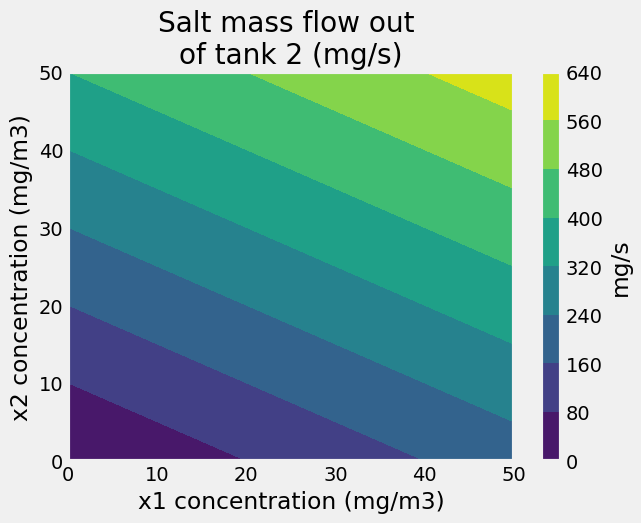

In [23]:
plt.contourf(X1,X2,C*12)
plt.xlabel('x1 concentration (mg/m3)')
plt.ylabel('x2 concentration (mg/m3)')

cbar=plt.colorbar()
cbar.set_label('mg/s')
plt.title('Salt mass flow out \nof tank 2 (mg/s)');

## Efficient storage of a matrix

The __LU decomposition__ provides an efficient method to store matrices for use repeated solutions. In the example with the mixing tank, if the flow rates between each tank are fixed, then the matrix $\mathbf{A}$ remains unchanged. The only variables are the salt concentrations entering tanks 1 and 3. By storing the matrix as its lower, $\mathbf{L}$, and upper, $\mathbf{U}$, decomposed form, you save ~50% of the computational time to get the same answers. 

The matrix $\mathbf{U}$ is the end result of the Gaussian elimination, but how can you create the matrix $\mathbf{L}$? You are using the [Doolittle Decomposition](https://en.wikipedia.org/wiki/LU_decomposition#Doolittle_algorithm), so each term on the diagonal is $1$ and each off-diagonal component is the factor that you multiplied in the Gaussian elimination steps. Consider the two masses connected by springs with forces applied, as discussed earlier. 

<img src="../images/spring_mass.png" style="height: 200px;"/> 

1. $-400x_1+300x_2 = 10$

2. $300x_1-450x_2 = 20$


$\left[ \begin{array}{cc}
-400 & 300 \\
300 & -450  \end{array} \right]\left[\begin{array}{c} 
x_{1} \\ 
x_{2} \end{array}\right]=
\left[\begin{array}{c} 
10 \\ 
20\end{array}\right]$

Our matrix is as follows:

$\mathbf{A}=\left[ \begin{array}{cc}
-400 & 300 \\
300 & -450  \end{array} \right]$

Now you subtract $-3/4(row~1)$ from $row~2$ to create our $\mathbf{U}$ matrix. 

$\mathbf{U}=\left[ \begin{array}{cc}
-400 & 300 \\
300-3/4\cdot400 & -450+3/4\cdot300  \end{array} \right]=
\left[ \begin{array}{cc}
-400 & 300 \\
0 & -300  \end{array} \right]$

The lower matrix stores this factor, $-3/4$ in the second row, first column

$\mathbf{L}=\left[ \begin{array}{cc}
1 & 0 \\
-3/4 & 1  \end{array} \right]$

### Exercise

Confirm that 


$\mathbf{LU}=\mathbf{A}=\left[ \begin{array}{cc}
1 & 0 \\
-3/4 & 1  \end{array} \right]\left[ \begin{array}{cc}
-400 & 300 \\
0 & -300  \end{array} \right]=
\left[ \begin{array}{cc}
-400 & 300 \\
300 & -450  \end{array} \right]
$

## Create LU decomposition function

Extending this to larger matrices, involves storing the _factor_ for each step in the Gaussian elimination process in each row, column of the lower triangular $\mathbf{L}-$ matrix. Take a look at the defined `LUNaive` function below

In [24]:
def LUNaive(A):
    '''LUNaive: naive LU decomposition
    L,U = LUNaive(A): LU decomposition without pivoting.
    solution method requires floating point numbers, 
    as such the dtype is changed to float
    
    Arguments:
    ----------
    A = coefficient matrix
    returns:
    ---------
    L = Lower triangular matrix
    U = Upper triangular matrix
    '''
    [m,n] = np.shape(A)
    if m!=n: error('Matrix A must be square')
    nb = n+1
    # Gauss Elimination
    U = A.astype(float)
    L = np.eye(n)

    for k in range(0,n-1):
        for i in range(k+1,n):
            if U[k,k] != 0.0:
                factor = U[i,k]/U[k,k]
                L[i,k]=factor
                U[i,:] = U[i,:] - factor*U[k,:]
    return L,U

### Exercise

Use the `LUNaive` function to create $\mathbf{L}$ and $\mathbf{U}$ matrices from the following three matrices. Confirm that $\mathbf{LU}=\mathbf{A}$ in each case.

1. $\mathbf{A} =
\left[ \begin{array}{cc}
18 & -2  \\
-2 & 10 \end{array} \right]$

2. $\mathbf{A} =
\left[ \begin{array}{ccc}
10 & 3 & 1 \\
4 & 5 & 2 \\
2 & 1 & 6 \end{array} \right]$

3. $\mathbf{A} =
\left[ \begin{array}{cccc}
-7 & 3 & 1 & 1 \\
3 & -19 & 12 & 0 \\
7 & 5 & -10 & 0 \\
0 & 2 & 4 & -12 \end{array} \right]$

### Problem (Diagonal element is zero)

All of the functions defined in this notebook are `Naive` (`GaussNaive` and `LUNaive`). They are called naive because if an element along the diagonal is 0, they will return `NaN` and if it is $\lll 1$ it will introduce large errors, because you use the diagonal to calculate each $factor =\frac{A_{ij}}{A_{ii}}$. 

If a diagonal element is 0 or very small either:

1. no solution found
2. errors are introduced 

Therefore, a robust method will use [pivoting](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) before applying __Gauss elimination__ or __LU factorization__. __Partial pivoting__ only reorganizes rows, leaving the columns unchanged. __Full pivoting__ switches both rows and columns, thereby changing the order of equations and unknown variables. In practice, most functions that use __Gauss elimination__ or __LU factorization__ use __partial pivoting__: only switching rows. 

Consider:

a. $\left[ \begin{array}{cccc}
1e-15 & 3.0000  \\
1.0000 & 1.0000  \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \end{array} \right]=
\left[ \begin{array}{c}
2 \\
1.0000 \end{array} \right]$

b.  $\left[ \begin{array}{cccc}
0 & 2 & 3  \\
4 & 6 & 7 \\
2 & -3 & 6  \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \end{array} \right]=
\left[ \begin{array}{c}
8 \\
-3 \\
5\end{array} \right]$ 

switch $x_1$ and $x_2$

$\left[ \begin{array}{cccc}
2 & 0 &  3  \\
7 & 4 &  7 \\
-3 & 2 &  6  \end{array} \right]
\left[ \begin{array}{c}
x_{2} \\
x_{1} \\
x_{3} \end{array} \right]=
\left[ \begin{array}{c}
8 \\
-3 \\
5\end{array} \right]$

In [25]:
Aa = np.array([[1e-15,3],[1,1]])
ba = np.array([2,1])
x_a,aug_a=GaussNaive(Aa,ba)

print(x_a)
print(aug_a)

[0.         0.66666667]
[[ 1.e-15  3.e+00  2.e+00]
 [ 0.e+00 -3.e+15 -2.e+15]]


According to our `GaussNaive` solution, $x_1=0$ and $x_2=2/3$, but plugging these values into our original equation you get the following result:

a. $\left[ \begin{array}{cccc}
1e-15 & 3.0000  \\
1.0000 & 1.0000  \end{array} \right]
\left[ \begin{array}{c}
0 \\
2/3 \end{array} \right]=
\left[ \begin{array}{c}
2 \\
2/3 \end{array} \right]\neq
\left[ \begin{array}{c}
2 \\
1 \end{array} \right]$

In [26]:
Aa@np.array([0,2/3])

array([2.        , 0.66666667])

If you switch equation 1 with equation 2, the result is

a. $\left[ \begin{array}{cccc}
1.0000 & 1.0000 \\
1E-15 & 3.0000  \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \end{array} \right]=
\left[ \begin{array}{c}
1.0000 \\
2 \end{array} \right]$

and the solution changes to $x_1=1/3$ and $x_2=2/3$. This solution satisfies our initial equations.

In [27]:
Aa = np.array([[1,1],[1e-19,3]])
ba = np.array([1,2])
x_a,aug_a=GaussNaive(Aa,ba)

print('solution=',x_a)
print('confirm b=Ax ->',Aa@np.array([1/3,2/3]))

solution= [0.33333333 0.66666667]
confirm b=Ax -> [1. 2.]


Now consider the (b) equations. You should notice the $\mathbf{0}$ in the first diagonal position will be a problem. Really you can the first row with any other row to get a solution.

b.  $\left[ \begin{array}{cccc}
\mathbf{0} & 2 & 3  \\
4 & 6 & 7 \\
2 & -3 & 6  \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \end{array} \right]=
\left[ \begin{array}{c}
8 \\
-3 \\
5\end{array} \right]$

In [28]:
Ab = np.array([[0,2,3],[4,6,7],[2,-3,6]])
bb = np.array([8,-3,5])

x_b, aug_b = GaussNaive(Ab,bb)
print(x_b)
print(aug_b)

[nan nan nan]
[[  0.   2.   3.   8.]
 [ nan -inf -inf -inf]
 [ nan  nan  nan  nan]]


/tmp/ipykernel_2215/1119853754.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  factor = Aug[i,k]/Aug[k,k]
/tmp/ipykernel_2215/1119853754.py:25: RuntimeWarning: invalid value encountered in multiply
  Aug[i,:] = Aug[i,:] - factor*Aug[k,:]
/tmp/ipykernel_2215/1119853754.py:24: RuntimeWarning: invalid value encountered in double_scalars
  factor = Aug[i,k]/Aug[k,k]


## Exercise

Swap row 1 with either row 2 or row 3. What is the solution for `x_b` now? Show that if you plug in the solution for $[x_1,~x_2,~x_3]$ into the unpivoted $\mathbf{A}$ that the result is $[8,~-3,~5]$.

## Existing [linear algebra functions in Python](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

It is cumbersome to review each matrix that you want to solve for possible divide-by-zero errors and warnings. The function `np.linalg.solve` uses partial pivoting during the solution so that you do not get errors. 

You can also use the existing `scipy.linalg.lu` function that performs partial pivoting to store our matrices in an efficient manner. [Scipy.linalg](http://scipy.github.io/devdocs/tutorial/linalg.html) contains all of the same functions that numpy.linalg contains, plus some extra useful functions, such as our __LU decomposition__ function of interest, `lu`. 

Because `scipy.linalg.lu` introduces pivoting, you have an extra matrix that is output, `P`. The `P`-matrix keeps track of pivoting during the creation of `L` and `U`. The result is that 

$\mathbf{PLU} = \mathbf{A}$

so, if you want to use the LU solution, you have to add the matrix $\mathbf{P}$ to our solution. The permutation matrix, rearranges rows and columns so if you want to undo this operation, you can use the transpose, $\mathbf{P^T}$, switching each element's row for its column index. The new solution is the following,  

$\mathbf{PLUx-b}=\mathbf{P^T PLy-P^Tb}=\mathbf{0}$

$\mathbf{Ly-P^Tb}=\mathbf{0}$

$\mathbf{Ux-y}=\mathbf{0}$

In this form, you can use our original `solveLU` function

```python
x = solveLU(L,U,P.T@b)
```

In [29]:
from scipy.linalg import lu

P,L,U = lu(Ab) # a built-in partial-pivoting LU decomposition function
print('P=\n',P)
print('L=\n',L)
print('U=\n',U)

P=
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
L=
 [[ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]
 [ 0.         -0.33333333  1.        ]]
U=
 [[ 4.          6.          7.        ]
 [ 0.         -6.          2.5       ]
 [ 0.          0.          3.83333333]]


In [30]:
# linear algebra solution with built-in numpy solver
np.linalg.solve(Ab,bb)

array([-5.42391304,  0.02173913,  2.65217391])

In [31]:
# our unmodified solveLU function (with forward and backward substitution)
# note: output vector b is replaced with P.T@b (transpose(P)*b)
solveLU(L,U,P.T@bb)

array([-5.42391304,  0.02173913,  2.65217391])

## What you've learned

* Graph 2D and 3D linear algebra problems to identify a solution (intersections of lines and planes)
* How to solve a linear algebra problem using __Gaussian elimination__ (`GaussNaive`)
* Store a matrix with an efficient structure __LU decomposition__ where $\mathbf{A=LU}$
* Solve for $\mathbf{x}$ using forward and backward substitution (`solveLU`)
* Create the __LU Decomposition__ using the Naive Gaussian elimination process (`LUNaive`)
* Why partial __pivoting__ is necessary in solving linear algebra problems
* How to use the existing `scipy.linalg.lu` to create the __PLU decomposition__
* How to use the __PLU__ efficient structure to solve our linear algebra problem (`solveLU`)


## References

1. Chapra, Steven _Applied Numerical Methods with Matlab for Engineers._ __ch 8.__ McGraw Hill. 

2. Kiusalaas, Jaan _Numerical Methods in Engineering with Python 3._ __ch 2.__ Cambridge University Press. 

3. [_"Essence of Linear Algebra"_](http://3b1b.co/eola) 3 Blue 1 Brown Linear algebra series.